In [32]:
import torch

In [33]:
with open("names.txt", "r") as file:
    names = file.readlines()
names = [name.strip() for name in names]

In [34]:
names[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [35]:
len(names)

32033

In [36]:
min(len(name) for name in names)

2

In [37]:
max(len(name) for name in names)

15

In [38]:
t = {}
for n in names:
    chs = ['<S>'] + list(n) + ['<E>']
    for ch1, ch2, ch3 in zip(chs, chs[1:], chs[2:]):
        trigram = (ch1, ch2, ch3)
        t[trigram] = t.get(trigram, 0) + 1

In [39]:
sorted(t.items(), key = lambda kv: -kv[1])

[(('a', 'h', '<E>'), 1714),
 (('n', 'a', '<E>'), 1673),
 (('a', 'n', '<E>'), 1509),
 (('o', 'n', '<E>'), 1503),
 (('<S>', 'm', 'a'), 1453),
 (('<S>', 'j', 'a'), 1255),
 (('<S>', 'k', 'a'), 1254),
 (('e', 'n', '<E>'), 1217),
 (('l', 'y', 'n'), 976),
 (('y', 'n', '<E>'), 953),
 (('a', 'r', 'i'), 950),
 (('i', 'a', '<E>'), 903),
 (('i', 'e', '<E>'), 858),
 (('a', 'n', 'n'), 825),
 (('e', 'l', 'l'), 822),
 (('a', 'n', 'a'), 804),
 (('i', 'a', 'n'), 790),
 (('m', 'a', 'r'), 776),
 (('i', 'n', '<E>'), 766),
 (('e', 'l', '<E>'), 727),
 (('y', 'a', '<E>'), 716),
 (('a', 'n', 'i'), 703),
 (('<S>', 'd', 'a'), 700),
 (('l', 'a', '<E>'), 684),
 (('e', 'r', '<E>'), 683),
 (('i', 'y', 'a'), 669),
 (('l', 'a', 'n'), 647),
 (('<S>', 'b', 'r'), 646),
 (('n', 'n', 'a'), 633),
 (('<S>', 'a', 'l'), 632),
 (('<S>', 'c', 'a'), 628),
 (('r', 'a', '<E>'), 627),
 (('n', 'i', '<E>'), 625),
 (('<S>', 'a', 'n'), 623),
 (('n', 'n', '<E>'), 619),
 (('n', 'e', '<E>'), 607),
 (('e', 'e', '<E>'), 605),
 (('e', 'y', '<

In [88]:
len(t)

6037

In [89]:
#sum the total number of trigrams
total = sum(t.values())
total

196113

In [40]:
N = torch.zeros((27, 27, 27), dtype=torch.int32)

In [41]:
chars = sorted(list(set(''.join(names))))
stoi = {s:i+1 for i, s in enumerate(chars)}
stoi['.'] = 0
itos = {i+1:s for i, s in enumerate(chars)}

In [42]:
for n in names:
    chs = ['.'] + list(n) + ['.']
    a = zip(chs, chs[1:], chs[2:])
    for ch1, ch2, ch3 in zip(chs, chs[1:], chs[2:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        ix3 = stoi[ch3]
        N[ix1, ix2, ix3] += 1
N.shape

#[first character], [second character], [third character]

torch.Size([27, 27, 27])

In [46]:
#we want to find the sum of the third characters for each unique [first character, second character] pair
N_sum = N.sum(dim=2)
N_sum.shape

torch.Size([27, 27])

In [86]:
N_sum



tensor([[   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
         1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
          134,  535,  929],
        [   0,  556,  541,  470, 1042,  692,  134,  168, 2332, 1650,  175,  568,
         2528, 1634, 5438,   63,   82,   60, 3264, 1118,  687,  381,  834,  161,
          182, 2050,  435],
        [   0,  321,   38,    1,   65,  655,    0,    0,   41,  217,    1,    0,
          103,    0,    4,  105,    0,    0,  842,    8,    2,   45,    0,    0,
            0,   83,    0],
        [   0,  815,    0,   42,    1,  551,    0,    2,  664,  271,    3,  316,
          116,    0,    0,  380,    1,   11,   76,    5,   35,   35,    0,    0,
            3,  104,    4],
        [   0, 1303,    1,    3,  149, 1283,    5,   25,  118,  674,    9,    3,
           60,   30,   31,  378,    0,    1,  424,   29,    4,   92,   17,   23,
            0,  317,    1],
        [   0,  679,  121,  153,  384, 1271,   82,

In [72]:
for i in range(1, 27):
    print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26


In [69]:
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z'}

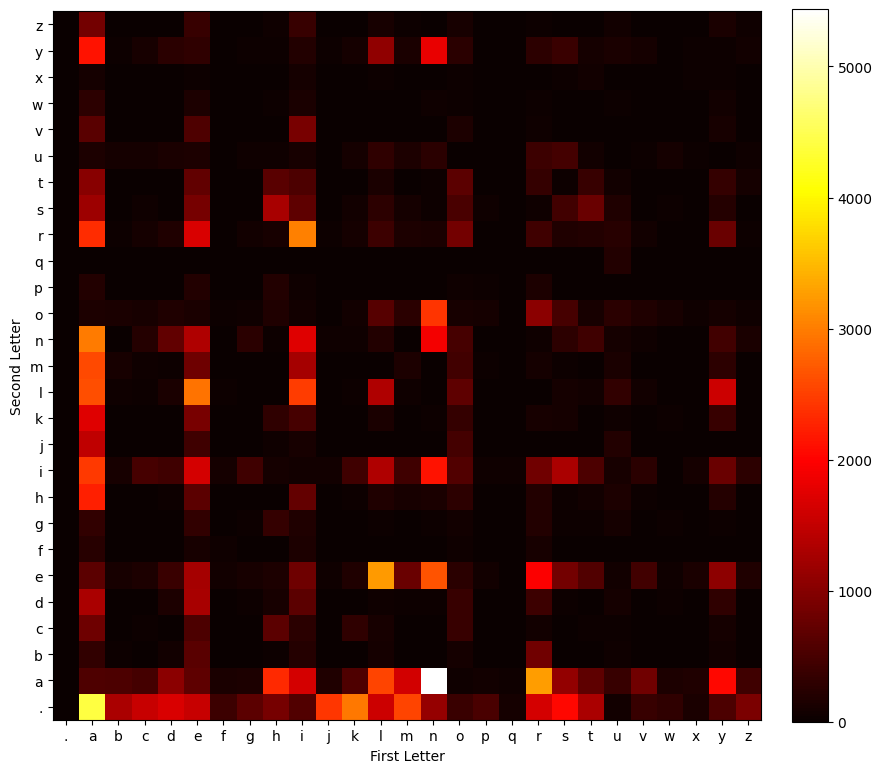

In [75]:
import matplotlib.pyplot as plt
import numpy as np

# Define the tick labels
tick_labels = ['.'] + [itos[i] for i in range(1, 27)]

# Create a heatmap using matplotlib
plt.figure(figsize=(10, 10))
im = plt.imshow(N_sum, cmap='hot')

# Customize the x and y axis ticks
plt.xticks(np.arange(0, 27, 1), tick_labels)
plt.yticks(np.arange(0, 27, 1), tick_labels)

# Add x and y-axis labels
plt.xlabel("First Letter")
plt.ylabel("Second Letter")

# Invert the y-axis
plt.gca().invert_yaxis()

# Add a colorbar
plt.colorbar(im, fraction=0.046, pad=0.04)

# Show the heatmap
plt.show()


In [ ]:

# Customize the x and y axis ticks
plt.xticks(np.arange(0, 27, 1), tick_labels)
plt.yticks(np.arange(0, 27, 1), tick_labels)

# Add x and y-axis labels
plt.xlabel("First Letter")
plt.ylabel("Second Letter")

# Invert the y-axis
plt.gca().invert_yaxis()

# Add a colorbar
plt.colorbar(im, fraction=0.046, pad=0.04)

# Show the heatmap
plt.show()


In [ ]:

# Customize the x and y axis ticks
plt.xticks(np.arange(0, 27, 1), tick_labels)
plt.yticks(np.arange(0, 27, 1), tick_labels)

# Add x and y-axis labels
plt.xlabel("First Letter")
plt.ylabel("Second Letter")

# Invert the y-axis
plt.gca().invert_yaxis()

# Add a colorbar
plt.colorbar(im, fraction=0.046, pad=0.04)

# Show the heatmap
plt.show()


In [83]:
#maximum sum for any given pair of two letters.
max_sum = N_sum.max().item()
print(max_sum)

5438


In [85]:
#sanity check, calculate the number of trigrams
sum(N_sum)

tensor([    0, 33885,  2645,  3532,  5496, 20423,   905,  1927,  7616, 17701,
         2900,  5040, 13958,  6642, 18327,  7934,  1026,   272, 12700,  8106,
         5570,  3135,  2573,   929,   697,  9776,  2398])